# Carregar as bibliotecas

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, stats, fft
from skimage import io, data, filters, util, color
from skimage.util import img_as_float, img_as_uint, img_as_ubyte

In [42]:
def log_imshow(img):
    return np.log( np.abs(img)+1 )

In [43]:
def mapping(img):
    nimg = img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

In [44]:
def show(img_list, caption_list, Axis=False, rescale = True):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        if rescale:
            ax[i].imshow(img_list[i], cmap='gray')
        else:
            if np.max(img_list[i]) <= 1:
                ax[i].imshow(img_list[i], cmap='gray', vmin=0, vmax=1)
            else:
                ax[i].imshow(img_list[i], cmap='gray', vmin=0, vmax=255)
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

# Questão 1

<p align="justify">
O função <i>util.random_noise()</i> é utilizada para inserir ruído dentro de uma imagem. Entre os tipos de ruídos implementados está o ruido ``sal e pimenta'' (<i>mode = 's&p'</i>). Este tipo de ruído adiciona pontos brancos e pretos dentro da imagem. Adicione ruído sal e pimenta em uma imagem e remova o ruído inserido utilizando os métodos da mediana e minmax. Logo, compare as imagens resultantes com a imagem original utilizando o erro médio quadrático normalizado.
$$NMSE =\frac{\sum_{x=0}^{M-1}\sum_{y=0}^{N-1} (f(x,y) - g(x,y))^2 }{\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)}$$
</p>

<p align="justify">

</p>

In [45]:
def filtros_median_minmax(noise_img):
    footprint = np.ones((3, 3))
    img_median = filters.rank.median(noise_img)
    img_min_max = filters.rank.minimum(filters.rank.maximum(noise_img, footprint=footprint), footprint=footprint)
    return img_median, img_min_max

In [46]:
def NMSE(f, g):
  f = util.img_as_float(f)
  g = util.img_as_float(g)
  return np.sum((f - g)**2) / np.sum(f)

In [47]:
lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_', as_gray=True)
clown = io.imread('https://drive.google.com/uc?id=1JIiGsypcTefhq1s1Hk9fQIks8GE5KbuK', as_gray=True)

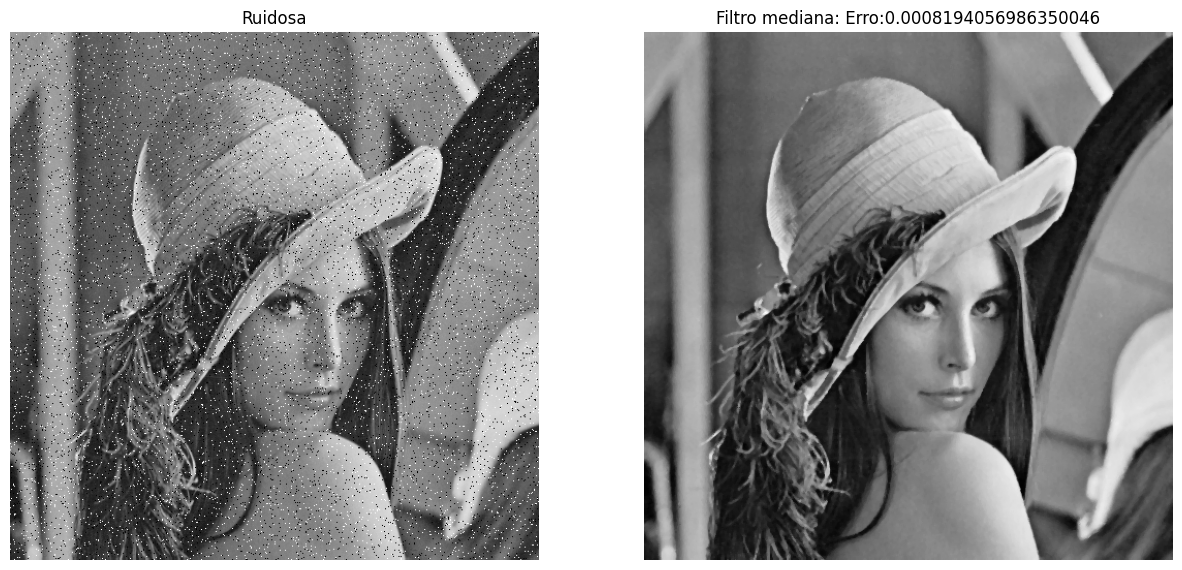

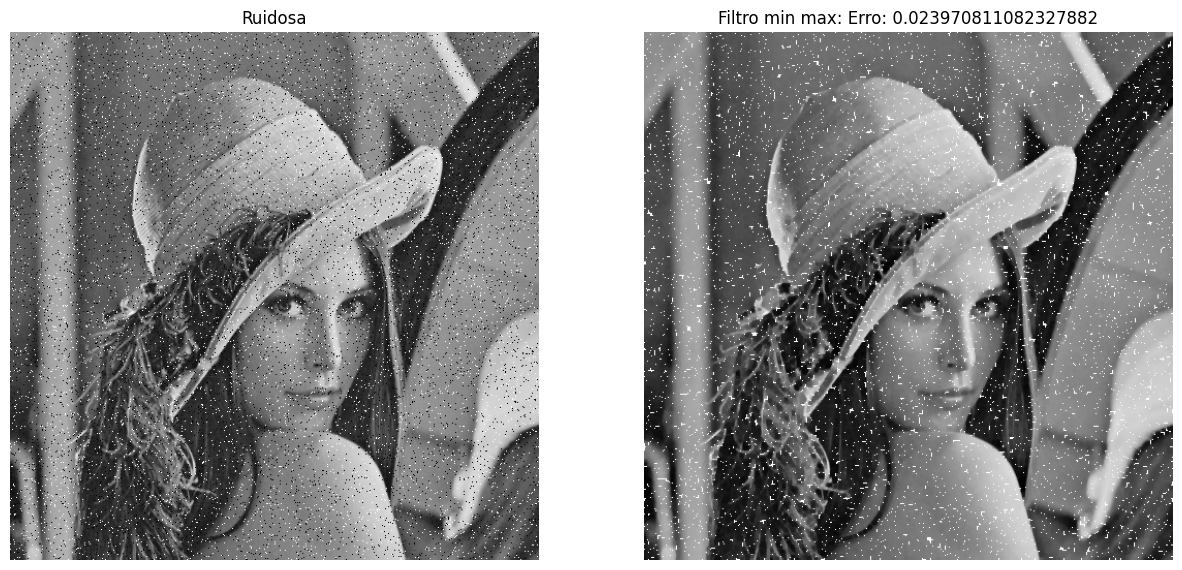

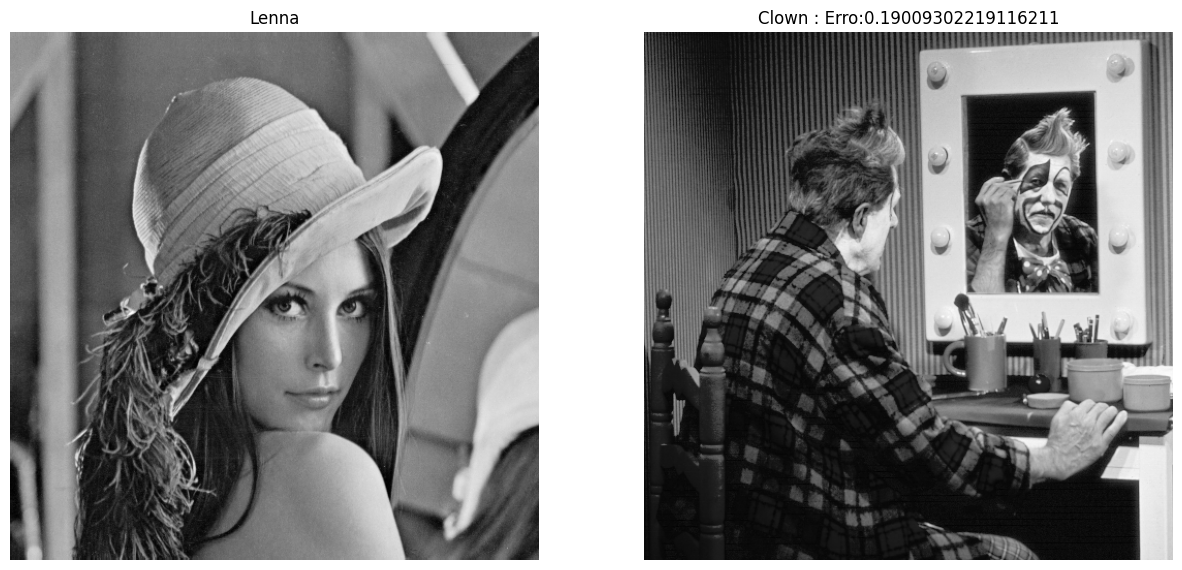

In [48]:
noise_img = img_as_ubyte(util.random_noise(lenna, mode='s&p') )
img_median, img_min_max = filtros_median_minmax(noise_img)

show([noise_img,img_median],['Ruidosa',f'Filtro mediana: Erro:{NMSE(lenna, img_median)}'])
show([noise_img,img_min_max],['Ruidosa',f'Filtro min max: Erro: {NMSE(lenna, img_min_max)}'])
show([lenna, clown],['Lenna',f'Clown : Erro:{NMSE(lenna, clown)}'])

# Questão 2
<p align="justify">
Implementar o método de realce de imagens, onde $$f_{highpass}(x,y) = (1+G).f(x,y)-G.f_{mean}(x,y)$$
onde $0 \leq G \leq 2$
</p>

In [49]:
def enhance(img, G=2, sigma=1):
    f = img_as_float(img)
    f_mean = filters.gaussian(f, sigma)
    return np.clip((1 + G) * f - G * f_mean, 0, 1)

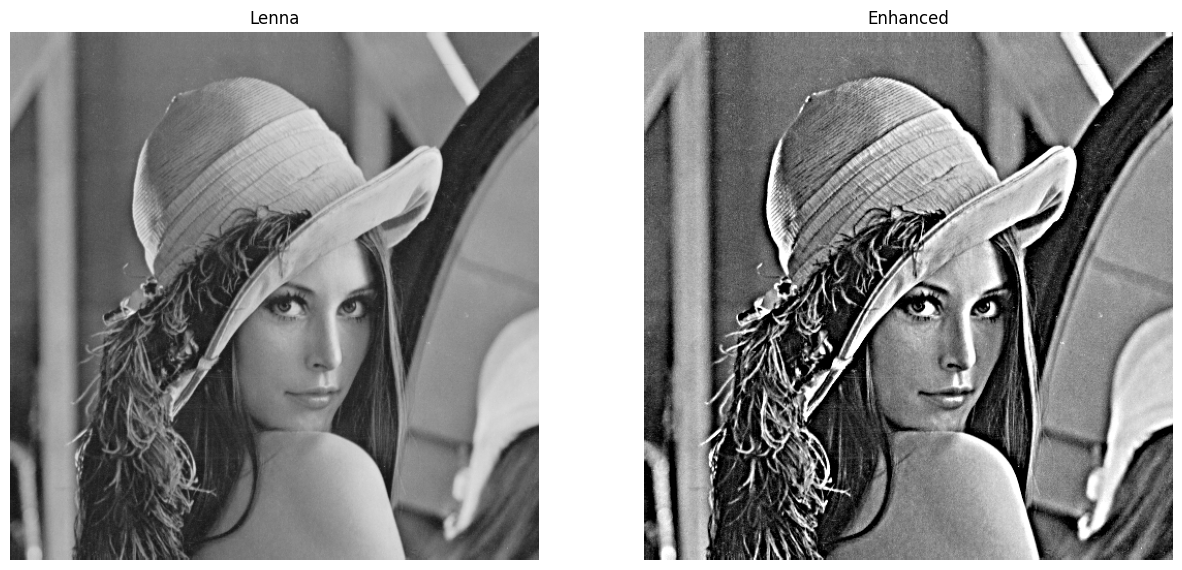

In [50]:
nimg = enhance(lenna, G=2, sigma=5)
show([lenna, nimg],['Lenna','Enhanced'],rescale = False)

# Questão 3

<p align="justify">
Dada a seguinte imagem, eliminar o ruído produzido pelo ruído periódico. Teste com os seguinte filtros: média, mediana e a filtragem no domínio da frequência. Para o caso da filtragem no domínio da frequência, primeiro calcule o espectro de Fourier (Figura b) e elimine a \textbf{região} ao redor dos ``spikes'' (assinalados com a seta vermelha). Os ``spikes'' estão localizados nas coordenadas (88,88) e (170,170). A terceira imagem mostra o processo depois de apagar esses valores.
Para apagar os valores, basta atribuir zero para todos os elementos da região.
</p>

<p align="justify">

</p>

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1ExhUVoHaj2i4gN1UWC6U7RfP-boZhnRL" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1BGJbV6sXNNlt2PmIZ7RCyHpQfPRpZgJ6" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1d3bAvzHJ5wRwPxIXGZXiUhP7bA5o0SbY" alt="Drawing"  width="300"/> </td>
</tr></table>

In [51]:
def filtragem(img, window_size=5, coord1=(88,88), coord2=(170,170)):
    def apagar(F, coord, r=5):
        x, y = coord
        h, w = F.shape
        F[x-r:x+r+1, y-r:y+r+1] = 0
        F[h-x-r:h-x+r+1, w-y-r:w-y+r+1] = 0

    F = np.fft.fftshift(np.fft.fft2(img_as_float(img)))
    fimg = F.copy()
    apagar(fimg, coord1)
    apagar(fimg, coord2)

    img_rec = np.clip(np.real(np.fft.ifft2(np.fft.ifftshift(fimg))), 0, 1)
    return img_rec, fimg

In [52]:
lennaR = io.imread('https://drive.google.com/uc?id=1ExhUVoHaj2i4gN1UWC6U7RfP-boZhnRL', as_gray=True)

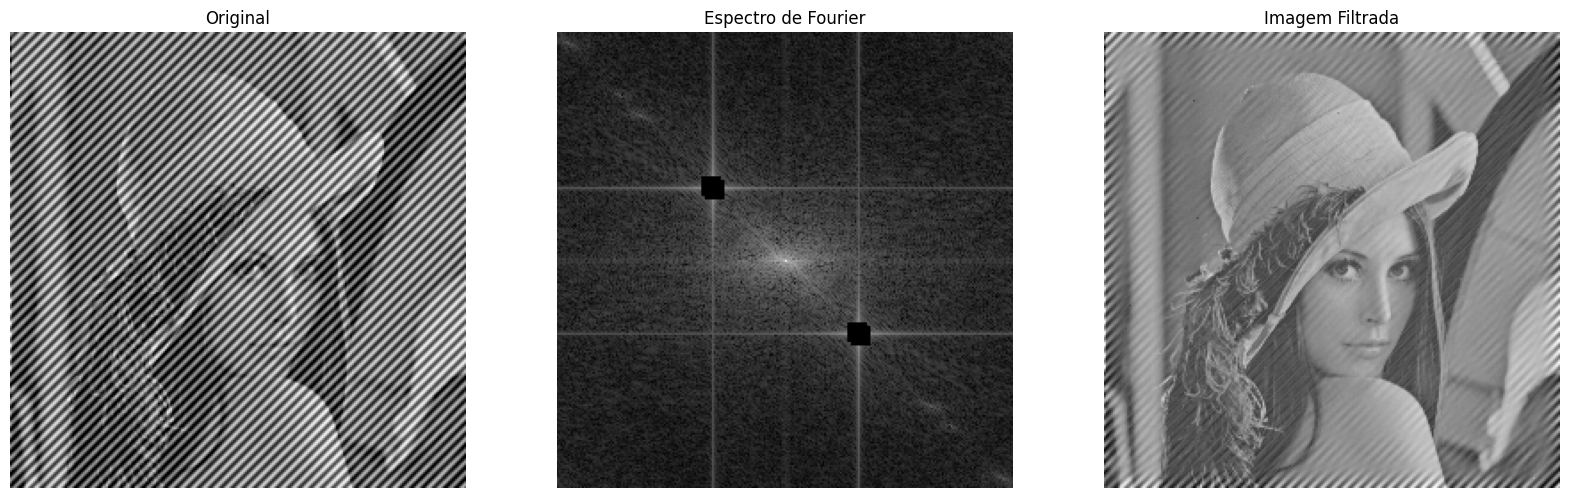

In [53]:
nimg, fimg = filtragem(lennaR, window_size=10)
show([lennaR,log_imshow(fimg),nimg],['Original','Espectro de Fourier','Imagem Filtrada'])

## Questao 4
<p> A ideia principal do $\textit{unsharp masking}$ é que o desfoque da imagem remova os detalhes de uma imagem, mas se adicionarmos esses detalhes de volta à imagem dimensionada por um determinado fator, os detalhes seriam aprimorados e obteríamos uma imagem ``mais nítida''. O  $\textit{unsharp masking}$ é, portanto, definido como abaixo:
$$f + \alpha(f - f*g)$$
onde $f*g$ é a imagem suavizada, $f$ é a imagem original e $\alpha$ é um fator de escala. Implementar a função $\textit{unsharp masking}$
</p>

In [54]:
def passa_freq(img, mask):
    height, width = img.shape[:2]
    fimg = fft.fftshift( fft.fft2(img) )
    fimg = fimg * mask
    nimg = fft.ifft2(fimg)
    nimg = np.abs(nimg)
    return nimg, fimg

In [55]:
def gridFourier(M, N):
    u = np.arange(0, M)
    v = np.arange(0, N)

    u = u - np.floor(M/2)
    v = v - np.floor(N/2)
    U, V = np.meshgrid(u, v)
    return U, V

In [56]:
def mask_gaussiana(width, height, sigma):
    U, V = gridFourier(width, height)
    D = np.sqrt(U**2 + V**2)
    H = np.exp( -D**2/(2*sigma**2)  )
    return H

In [57]:
def highboost(img, radio=30, alpha=1):
    img = img_as_float(img)
    H = mask_gaussiana(*img.shape[::-1], sigma=radio)
    fimg = fft.fftshift(fft.fft2(img))
    img_smooth = np.abs(fft.ifft2(fft.ifftshift(fimg * H)))
    return np.clip(img + alpha * (img - img_smooth), 0, 1)

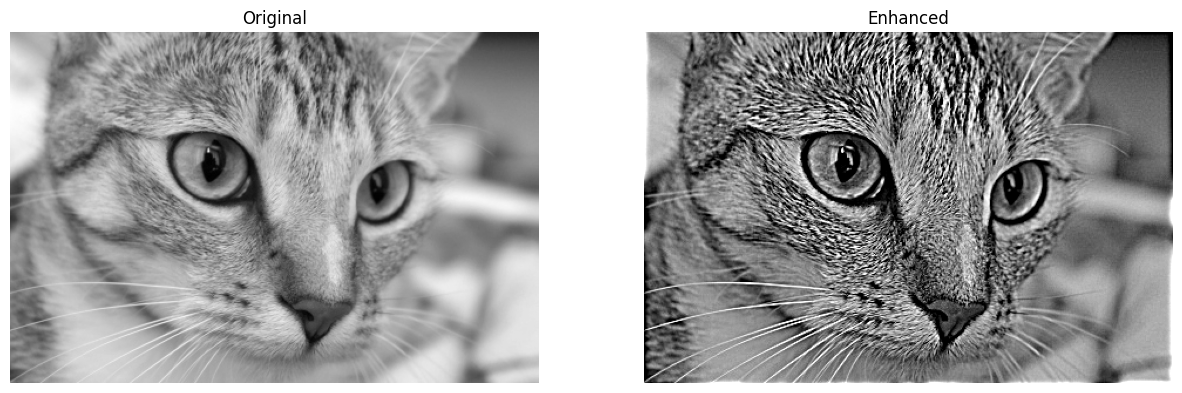

In [58]:
img = data.chelsea()
img = color.rgb2gray(img)
nimg = highboost(img, radio = 30, alpha = 5)
show([img,nimg],['Original','Enhanced'])

# Questão 5
<p align="justify">Mudar a cor do fundo (*background*) da imagem apresentada a continuação, ela deve estar em tons de azul claro e o corpo do fósforo em tons de amarelo. Além disso, é fornecido a imagem binária, onde os fósforos estão representados pela cor branca e o fundo pela cor preta. Use operações aritméticas para executar o processo de modificação do fundo. A continuação são mostradas a imagem em escala de cinza e a respectiva máscara.</p>


<table><tr>
<td>
<figure><img src="https://drive.google.com/uc?id=1V3OaLUh34dRCx-53PGsUYOMb1kZ1gqzo" alt="Drawing" width="300" class="center"/>
<figcaption>Imagem em escala de cinza</figcaption>
</figure>
</td>
<td>
<figure>
<img src="https://drive.google.com/uc?id=13NOF3oDNkmNtHCHmbX_9d0-AISPEmGZe" alt="Drawing" width="300" class="center"/>
<figcaption>Máscara</figcaption>
</figure>
</td>
</tr>
</table>


<p align="justify">DICA: para conseguir modificar a intensidade do fundo, incremente um valor $inc$ nos canais vermelho e verde, e incremente um valor $2*inc$ no canal azul. Preserve as intensidades originais dos fósforos. </p>


<p align="justify">A Figura a continuação mostra o resultado final. A imagem gerada deve ser colorida e o tecido (fundo da imagem) deve aparecer na cor azul claro. </p>

<center>
<figure>
<img src="https://drive.google.com/uc?id=1BILk7RPeAuurU7dGTi-tJLxvwfkxCFv5" alt="Drawing" width="300" class="center"/>
<figcaption>Imágem resultante</figcaption>
</figure>
</center>




In [59]:
def change_background(img, mask, inc=50, fosforo_factor=0.7):
    imgf = img_as_float(img)                          # Converte imagem para float no intervalo [0, 1]
    mask_bin = mask > 128                             # Cria máscara binária para identificar fósforos
    fundo = ~mask_bin                                 # Inverte a máscara para obter o fundo
    nimg = np.zeros((*img.shape[:2], 3), dtype=np.float32)  # Cria imagem de saída com 3 canais (RGB)

    # Aplica azul claro ao fundo: R e G aumentados com `inc`, B com o dobro
    inc_r = np.clip(imgf[fundo] + inc/255.0, 0, 1)          # Aumento nos canais R e G
    nimg[fundo] = np.stack([
        inc_r,                                              # Canal R
        inc_r,                                              # Canal G
        np.clip(imgf[fundo] + 2*inc/255.0, 0, 1)            # Canal B com intensidade extra
    ], axis=-1)

    # Aplica amarelo suave aos fósforos: R e G multiplicados, B = 0
    fosforo = fosforo_factor * imgf[mask_bin]               # Ajuste de intensidade
    nimg[mask_bin] = np.stack([
        fosforo,                                            # Canal R
        fosforo,                                            # Canal G
        np.zeros_like(fosforo)                              # Canal B = 0 (amarelo)
    ], axis=-1)

    return nimg

In [60]:
img = io.imread('https://drive.google.com/uc?id=1V3OaLUh34dRCx-53PGsUYOMb1kZ1gqzo')
mask = io.imread('https://drive.google.com/uc?id=13NOF3oDNkmNtHCHmbX_9d0-AISPEmGZe')

(600, 600, 3)


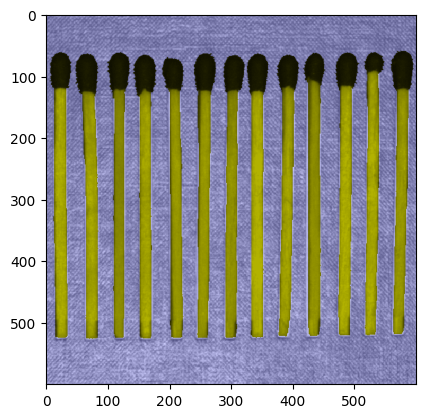

In [61]:
nimg = change_background(img, mask)
print(nimg.shape)
plt.imshow(nimg)

### Questão 6

https://www.eletrica.ufpr.br/marcelo/TE072/022007/Rodrigo-Halftoning.pdf

<p>O halftoning é uma técnica usada para simular imagens em tons de cinza ou cores contínuas usando apenas tons binários (preto e branco). Uma das formas mais eficazes de realizar o halftoning é através da difusão de erro, onde o erro de quantização de um pixel é distribuído para seus vizinhos ainda não processados, de acordo com uma matriz de difusão.</p>

<p>
Nesta atividade, você deverá implementar a técnica de halftoning por difusão de erro, utilizando a máscara de difusão proposta por Rogers.</p>

<p>A máscara de Rogers distribui o erro do pixel atual para os vizinhos da seguinte forma:</p>
\begin{bmatrix}
\bullet  & 3/8\\
 3/8 & 2/8
\end{bmatrix}

<p>Considere que o pixel atual está marcado com $\bullet$. O erro de quantização é distribuído para os três vizinhos indicados.</p>

<p>
<b>Roteiro para Implementação</b>
<ol>
<li>Pré-processamento:</li>
  <ul>
  <li>Converta a imagem de entrada para o tipo float, com valores normalizados entre 0 e 1.</li>
  </ul>
<li>Iteração sobre os pixels:</li>
  <ul>
  <li>Percorra a imagem pixel a pixel, ignorando a última linha e coluna para evitar acessos fora dos limites.</li>
  </ul>  
<li>Quantização binária:</li>
  <ul>
  <li>Compare o valor do pixel com um limiar (threshold, ex: 0.5).</li>
      <ul>
      <li>Se o valor do pixel for menor que o limiar, defina o valor binarizado como 0.</li>
      <li>Caso contrário, defina o valor como 1.</li>
      </ul>
  </ul>
<li>Cálculo do erro:</li>
  <ul>
  <li>O erro de quantização é calculado como:</li>
  $erro = valor\_original - valor\_binarizado$
  </ul>
<li>Difusão do erro:</li>
  <ul>
  <li>Distribua o erro para os pixels vizinhos segundo a máscara de Rogers:</li>
  \begin{matrix}
  a[i, j+1]   &+= 3/8 * erro\\
  a[i+1, j]   &+= 3/8 * erro\\
  a[i+1, j+1] &+= 2/8 * erro
  \end{matrix}

  </ul>
<li>Resultado:</li>
  <ul>
  <li>Retorne a imagem binarizada com os valores 0 e 1.</li>
  </ul>
</ol>
</p>

In [62]:
def halftone_rogers(img, thresh=0.5):
    a = img.astype(float)
    a /= a.max()
    b = np.zeros_like(a)
    h, w = a.shape
    for i in range(h - 1):
        for j in range(w - 1):
            old = a[i, j]; new = 1.0 if old >= thresh else 0.0
            b[i, j] = new; err = old - new
            a[i, j+1] += (3/8)*err
            a[i+1, j] += (3/8)*err
            a[i+1, j+1] += (2/8)*err
    return b

def show(images, titles):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
    for ax, im, title in zip(axes, images, titles):
        ax.imshow(im, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

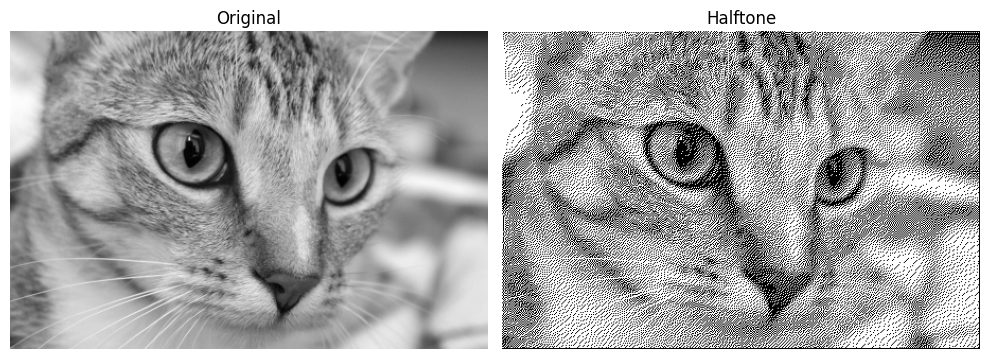

In [63]:
img = color.rgb2gray(data.chelsea())
nimg = halftone_rogers(img, 0.3)
show([img,nimg],['Original','Halftone'])